# Data Visualization - Heatmap Olympics

![Olympic rings](https://upload.wikimedia.org/wikipedia/commons/thumb/5/5c/Olympic_rings_without_rims.svg/2560px-Olympic_rings_without_rims.svg.png)

#### pandas Essential Training

The notebook is based on the idea from [Jonathan Fernandes](https://www.linkedin.com/in/jonathanafernandes/ "personal profile") and was adapted by [Fabian Kutschera](https://www.linkedin.com/in/fabian-kutschera/ "personal profile") to display the results of the Tokyo 2020 Olympics. 

More information about the task and how to use seaborn heatmaps are available on [Linkedin Learning](https://www.linkedin.com/learning/pandas-essential-training/learning-heatmaps?u=2108001 "pandas Essential Training").

In [1]:
# Import packages
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

#### How to read data from a webpage?

Follow the instructions on [towards data science](https://towardsdatascience.com/all-pandas-read-html-you-should-know-for-scraping-data-from-html-tables-a3cbb5ce8274).

In [2]:
# Read data from webpage
URL = "https://olympics.com/tokyo-2020/olympic-games/en/results/all-sports/medal-standings.htm"
dfs = pd.read_html(URL)
print(f'Total tables: {len(dfs)}')

Total tables: 5


In [3]:
olympics = dfs[0]
olympics.head()

,Rank,Team/NOC,Unnamed: 2,Unnamed: 3,Unnamed: 4,Total,RankbyTotal,NOCCode
0,1,United States of America,39,41,33,113,1,USA
1,2,People's Republic of China,38,32,18,88,2,CHN
2,3,Japan,27,14,17,58,5,JPN
3,4,Great Britain,22,21,22,65,4,GBR
4,5,ROC,20,28,23,71,3,ROC


In [4]:
olympics.rename(columns={"Unnamed: 2": "Gold", "Unnamed: 3": "Silver", "Unnamed: 4": "Bronze"}, inplace=True)
olympics.head()

,Rank,Team/NOC,Gold,Silver,Bronze,Total,RankbyTotal,NOCCode
0,1,United States of America,39,41,33,113,1,USA
1,2,People's Republic of China,38,32,18,88,2,CHN
2,3,Japan,27,14,17,58,5,JPN
3,4,Great Britain,22,21,22,65,4,GBR
4,5,ROC,20,28,23,71,3,ROC


In [5]:
oo = olympics[['NOCCode', "Gold", "Silver", "Bronze"]]
oo.head()

,NOCCode,Gold,Silver,Bronze
0,USA,39,41,33
1,CHN,38,32,18
2,JPN,27,14,17
3,GBR,22,21,22
4,ROC,20,28,23


In [6]:
oo.set_index('NOCCode', inplace=True)
oo.head()

,Gold,Silver,Bronze
NOCCode,,,
USA,39,41,33
CHN,38,32,18
JPN,27,14,17
GBR,22,21,22
ROC,20,28,23


In [7]:
# Preparation for heatmap
oo = oo.transpose()
oo.head()

NOCCode,USA,CHN,JPN,GBR,ROC,AUS,NED,FRA,GER,ITA,...,MEX,FIN,BOT,BUR,CIV,GHA,GRN,KUW,MDA,SYR
Gold,39,38,27,22,20,17,10,10,10,10,...,0,0,0,0,0,0,0,0,0,0
Silver,41,32,14,21,28,7,12,12,11,10,...,0,0,0,0,0,0,0,0,0,0
Bronze,33,18,17,22,23,22,14,11,16,20,...,4,2,1,1,1,1,1,1,1,1


In [8]:
oo

NOCCode,USA,CHN,JPN,GBR,ROC,AUS,NED,FRA,GER,ITA,...,MEX,FIN,BOT,BUR,CIV,GHA,GRN,KUW,MDA,SYR
Gold,39,38,27,22,20,17,10,10,10,10,...,0,0,0,0,0,0,0,0,0,0
Silver,41,32,14,21,28,7,12,12,11,10,...,0,0,0,0,0,0,0,0,0,0
Bronze,33,18,17,22,23,22,14,11,16,20,...,4,2,1,1,1,1,1,1,1,1


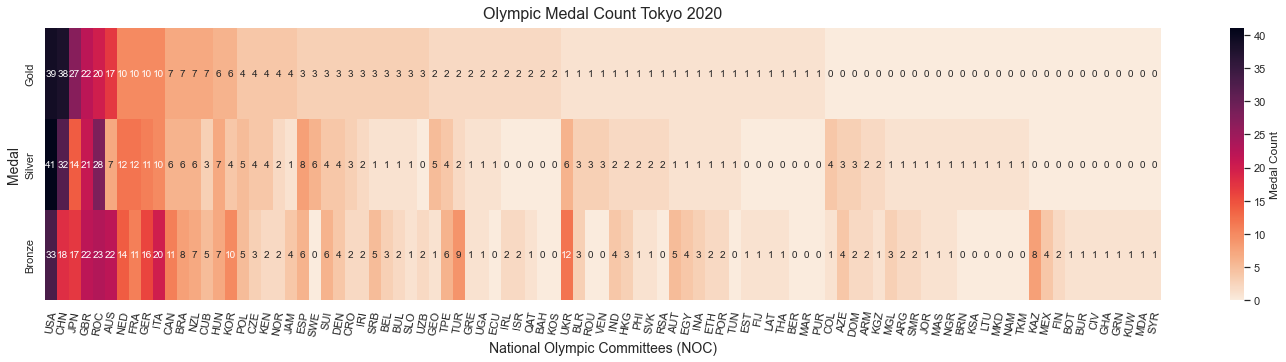

In [68]:
plt.figure(figsize=(25,5)) #(20,6)
plt.title("Olympic Medal Count Tokyo 2020", fontsize=16, pad=10)
#sns.set(font_scale=1)
heatmap = sns.heatmap(oo, cmap="rocket_r", xticklabels=True, yticklabels=True, annot=True,
            annot_kws={"size": 10},
            cbar_kws={'label': 'Medal Count', 'orientation': 'vertical'})#, 'shrink':0.8, 'aspect':15, 'pad':0.25})
heatmap.set_xticklabels(heatmap.get_xticklabels(), rotation=80) 
plt.xlabel("National Olympic Committees (NOC)", fontsize=14)
plt.ylabel("Medal", fontsize=14)
#plt.gcf().set_size_inches(20, 4) # for legend
#https://www.delftstack.com/de/howto/seaborn/size-of-seaborn-heatmap/
plt.show()